In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('insurance.csv')

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#plot styles
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']= (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title="rozklad wieku"
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red']
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title="Annual medical charges")
fig.update_layout(bargap=0.1)
fig.show()

Observations:
Most people pay less than 10k insurance
smokers tend to pay more than non smokers

<Axes: xlabel='sex', ylabel='charges'>

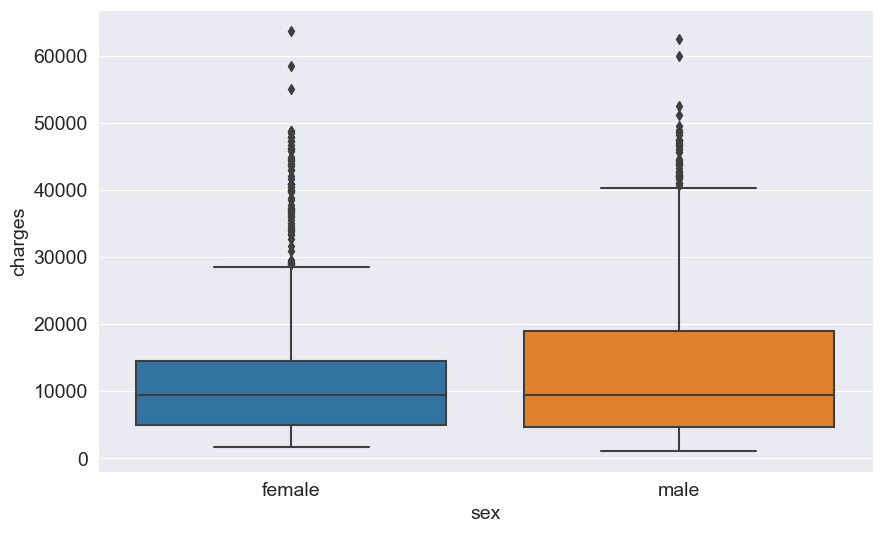

In [13]:
#EXERCISE: Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?
sns.boxplot(data=medical_df, y='charges',x='sex')

Observations: 50% of women pay 5000 - 15 000 while men 5000 - 20 000, the minimum charges are similar, similar medians, q3 is greater for men

<Axes: xlabel='region', ylabel='charges'>

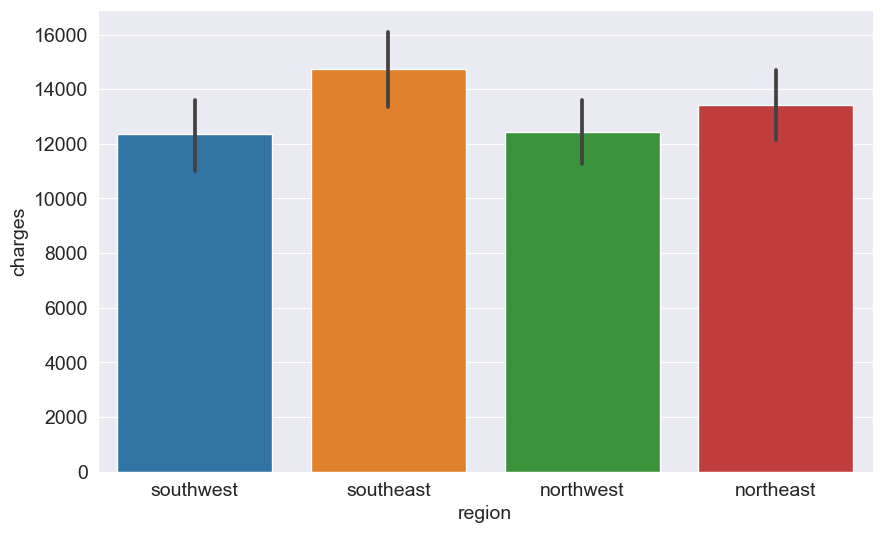

In [14]:
sns.barplot(data=medical_df, x='region', y='charges')

Observations: charges are the highest in southeast, northeast so basically in east. The diffetence is circa 2000

<Axes: xlabel='children', ylabel='charges'>

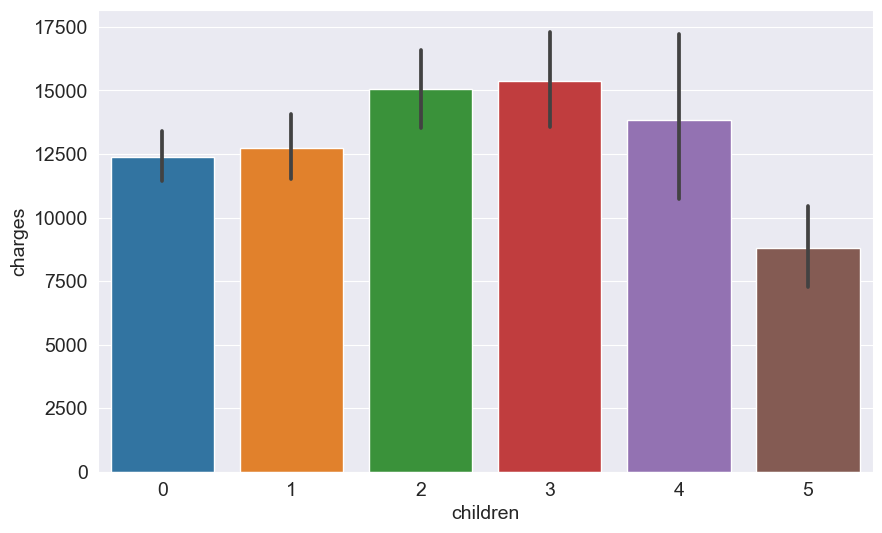

In [15]:
sns.barplot(medical_df,x='children',y='charges')

Observations: charges are the highest for people who have 2-3 children and the lowest for big families

In [16]:
# lets focus on smokers - it has a great impact on charges

In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
px.histogram(medical_df, x='smoker', color='sex',title='Smokers')

Observations: the similar amout of men and woman smokes and doesnt smoke, but smoking is more common for men
circa 20% of customers are smokers

In [19]:
# AGE smokers VS CHARGES
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 hover_data=['sex'],
                 opacity=0.8)
fig.show()

Observations:
we can see 3 clusters with increasing linear trend
among non smokers people mostly pay between 1000-15k
smokers have 2 different groups, maybe the higher group has another variable that makes charges higher - like smokers with additional diseases

In [20]:
#BMI smokers VS CHARGES
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8)
fig.show()

Observations:
for non smokers there is not a visible trend
for smokers we can see that charges increases with higher bmi

## Correlation

In [21]:
#corr coefficient
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [22]:
medical_df.charges.corr(medical_df.bmi)

0.1983409688336288

Observations: charges depend more on age then bmi

In [23]:
# convert to numeric types
smoker_values={'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [24]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984785

Interpretation:
Strength and direction - the greater the abs the stronger the relationship
coef 0 represents no linear relationship
coef 1 is a perfect relationship (on a line increasing)
coef -1 (on a line dicreasing)


In [25]:
# Assuming 'male' is mapped to 0 and 'female' is mapped to 1
medical_df['sex'] = medical_df['sex'].replace({'male': 0, 'female': 1})
medical_df['smoker'] = medical_df['smoker'].replace({'yes': 1, 'no': 0})


In [26]:
numeric_medical =medical_df[['charges','sex','children','age','smoker']]

<Axes: >

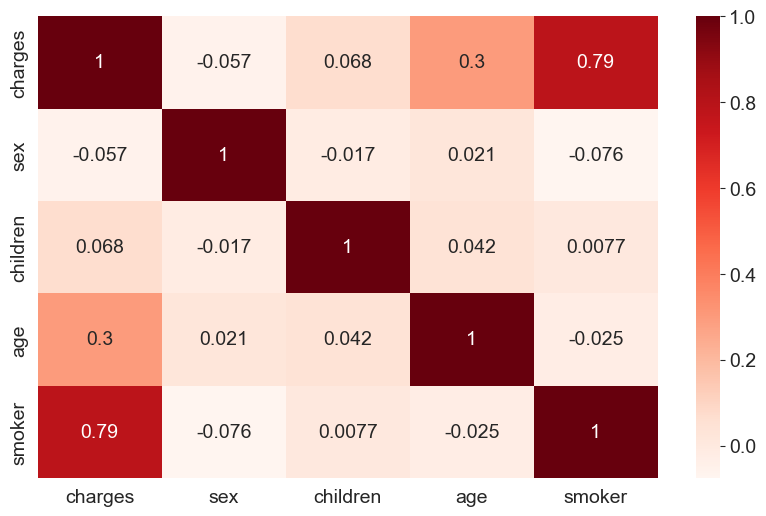

In [27]:
sns.heatmap(numeric_medical.corr(), cmap="Reds", annot = True)

Observations:
smoker has the highest correlation with charges
the correlation of age is also quite high

## Linear regression using one feature

In [28]:
non_smokers_df = medical_df[medical_df.smoker==0]

<Axes: xlabel='age', ylabel='charges'>

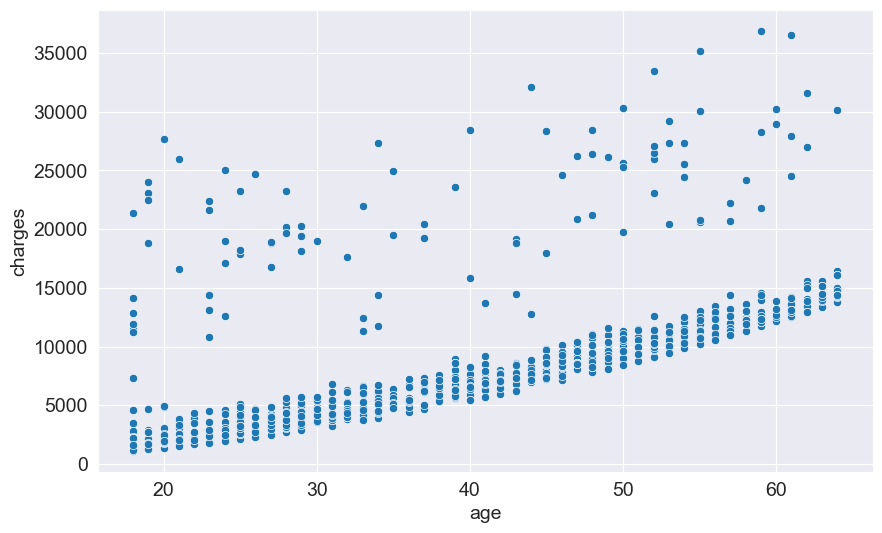

In [29]:
#lets estimate the charges based of "age" for nonsmokers
sns.scatterplot(data=non_smokers_df,
                x='age',
                y='charges')

Fitting a line to this data 

y = wx+b 


In [30]:
def estimate_charges(age,w,b):
    return w*age +b

In [31]:
w=50
b=100
ages= non_smokers_df.age

In [32]:
estimated_charges = estimate_charges(ages,w,b)

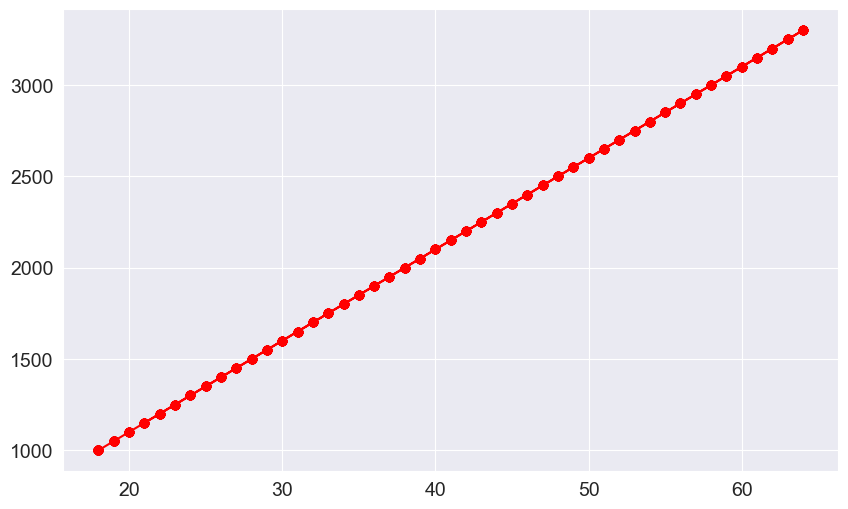

In [33]:
plt.plot(ages, estimated_charges,'r-o')

In [34]:
target = non_smokers_df.charges



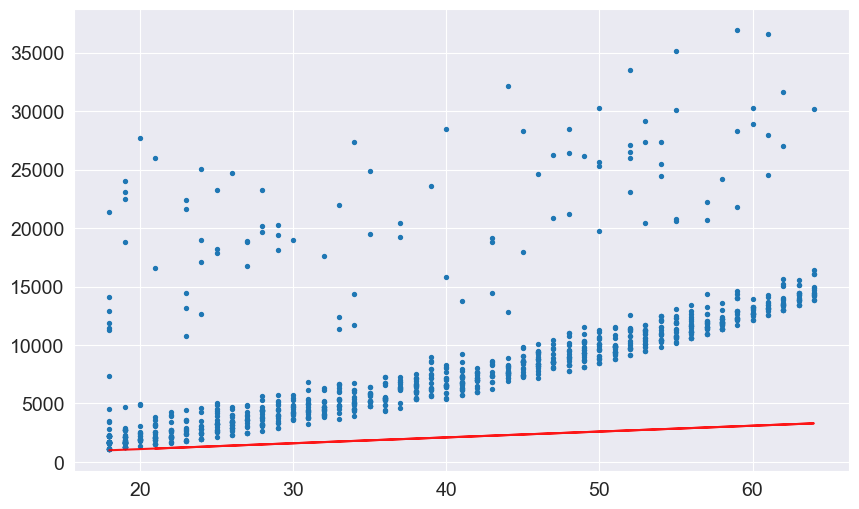

In [35]:
plt.plot(ages, estimated_charges,'r', alpha=0.9)
plt.scatter(ages, target,s=8)

We can see our model doesnt fit very well for w=50 and b=100

In [36]:
def try_parameters(w,b):
    ages=non_smokers_df.age
    target = non_smokers_df.charges
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges,'r')
    plt.scatter(ages,target, s=8)
    plt.xlabel('Age')
    plt.ylabel('charges')

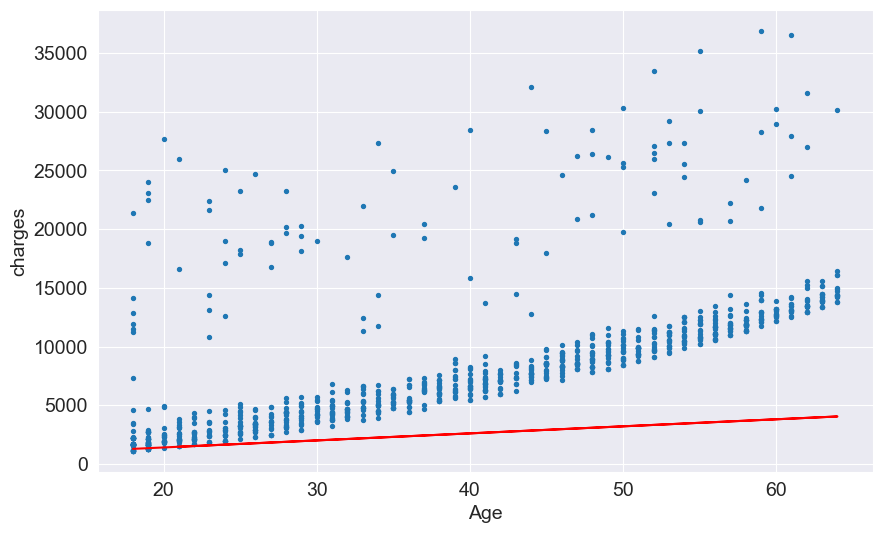

In [37]:
try_parameters(60,200)

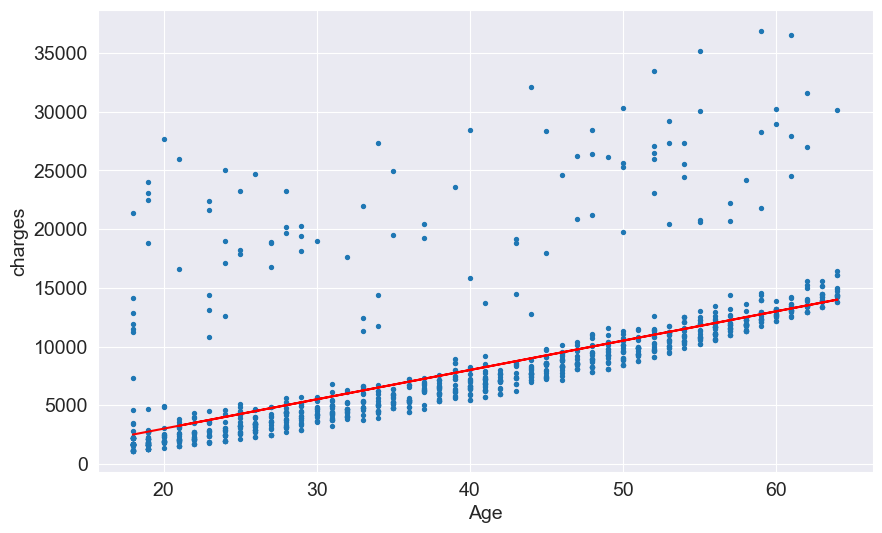

In [38]:
try_parameters(250,-2000)

We need a metric to see how good the line fits
We need a way to improve w and b once we have a bad model

## RMSE (root mean square error)
1) Differences between targets and model values
2) Square the values
3) Calculate the average of the values
4) Square root of the result


In [39]:
import numpy as np

In [40]:
def rmse(targets, predictions):
    squares = np.square(targets-predictions)
    return np.sqrt(np.mean(squares))

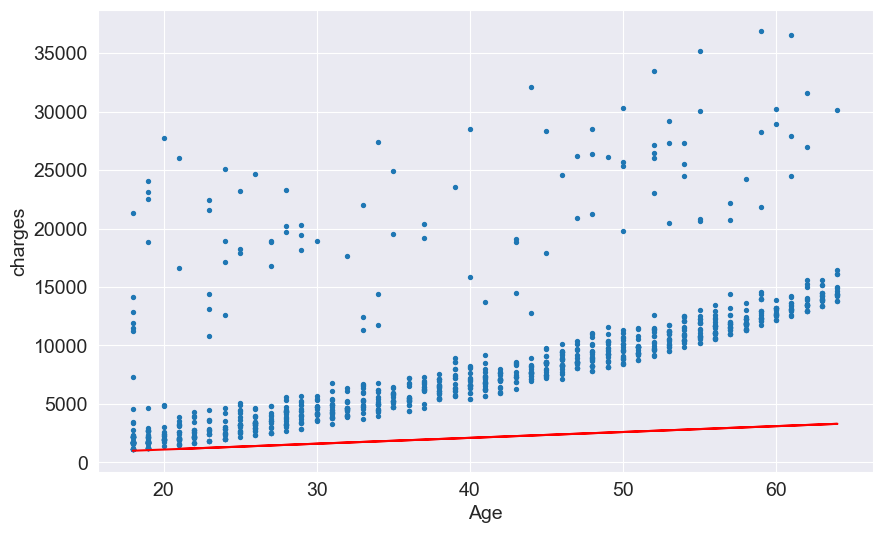

In [41]:
w=50
b=100
try_parameters(w,b)

In [42]:
targets=non_smokers_df.charges
predicted = estimate_charges(non_smokers_df.age,w,b)

In [43]:
rmse(targets,predicted)

8461.949562575493

Interpretation: on average each prediction differs from a real value by 8461$

## Optimizer
* ordinary least squares
* stochastic gradient descent

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model=LinearRegression()

In [46]:
inputs = non_smokers_df[['age']] #data frame not a series
targets = non_smokers_df.charges
#fit 
model.fit(inputs,targets)


LinearRegression()

In [47]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [48]:
rmse(targets,predictions)

4662.505766636395

In [49]:
model.coef_ #w

array([267.24891283])

In [50]:
model.intercept_ #b

-2091.4205565650827

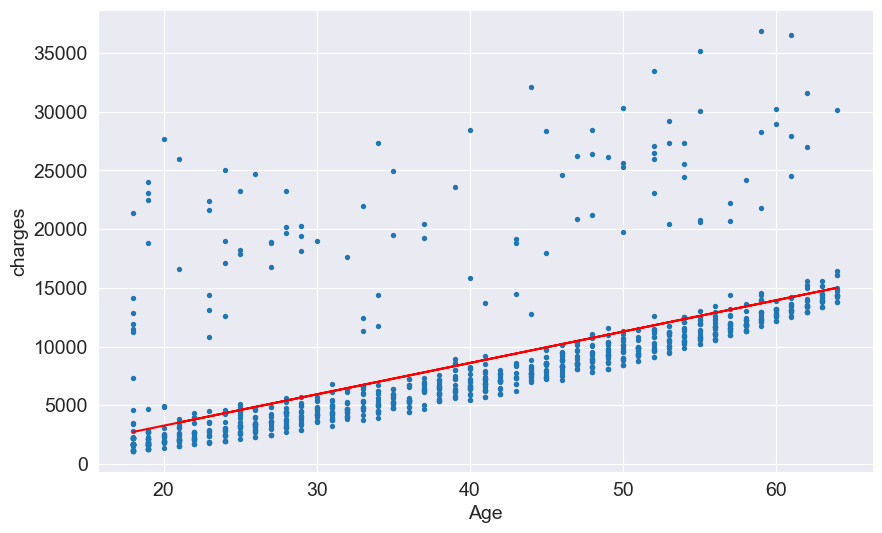

In [51]:
try_parameters(model.coef_, model.intercept_)

In [52]:
# different model
from sklearn.linear_model import SGDRegressor

In [53]:
model2 = SGDRegressor()

In [54]:
model2.fit(inputs,targets)

SGDRegressor()

In [55]:
predictions2 = model2.predict(inputs)
rmse(targets, predictions2)


5027.586429643674

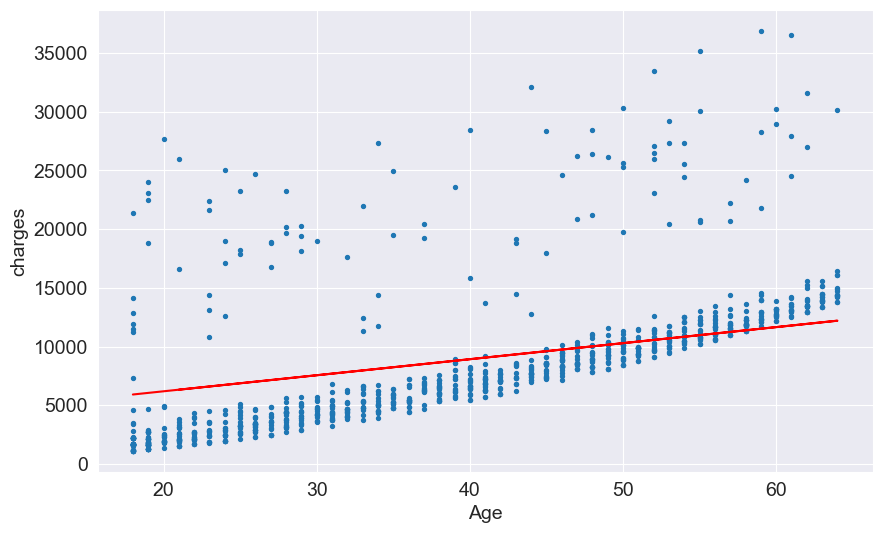

In [56]:
try_parameters(model2.coef_,model2.intercept_)

In [57]:
#The second model did a little worse than linearRegression

## Linear regression using many features

In [58]:
inputs, targets = non_smokers_df[['age','bmi']], non_smokers_df[['charges']] 

In [60]:
model=LinearRegression().fit(inputs,targets)

In [61]:
predictions=model.predict(inputs) #here we should pass new data for validation

In [63]:
loss = rmse(targets,predictions)
print("Loss:", loss)

Loss: 4662.3128354612945


## Categorical data
-> replace with numbers
* binary - replace with 0 and 1
* one-hot encoding for more than 2 categories - create a new column with 0-1 for each category
* natural order of categories - use numbers 1,2,3...

<Axes: xlabel='smoker', ylabel='charges'>

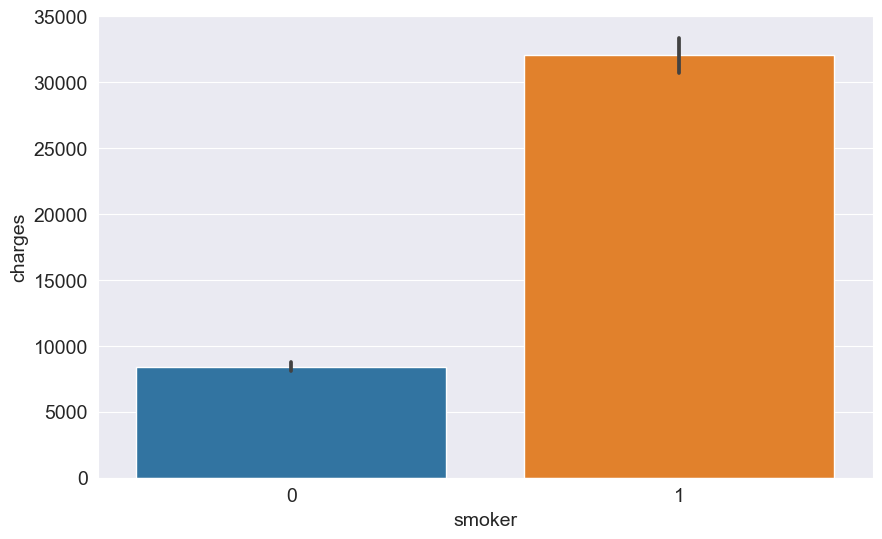

In [67]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [68]:
smoker_code={'no':0, 'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)

In [69]:
medical_df.charges.corr(medical_df.smoker) #now we can use this colum in linear regression

0.7872514304984785

In [71]:
inputs,targets = medical_df[['age','bmi','children','smoker']], medical_df[['charges']]

In [72]:
model= LinearRegression().fit(inputs,targets)

In [73]:
pred = model.predict(inputs)

In [74]:
loss=rmse(targets,pred)
print("Loss after adding smokers",loss)

Loss after adding smokers 6056.439217188081


In [76]:
# region one-hot encoding
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [78]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [79]:
#create 4 new columns
medical_df[['northeast','northwest','southeast','southwest']]= one_hot

In [80]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,NaN,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,southeast,1725.55230,NaN,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,southeast,4449.46200,NaN,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,northwest,21984.47061,NaN,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,northwest,3866.85520,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,NaN,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,northeast,2205.98080,NaN,1.0,0.0,0.0,0.0
1335,18,1,36.850,0,0,southeast,1629.83350,NaN,0.0,0.0,1.0,0.0
1336,21,1,25.800,0,0,southwest,2007.94500,NaN,0.0,0.0,0.0,1.0


## Model imporovements

We need to compare the importance of certain columns
We know the weights of the features, but we cant compare the weights for 2 features with different ranges 
STANDARDIZATION of every column 

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
numeric_cols =['age','bmi','children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [83]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [84]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [85]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [100]:
categorical_data = medical_df[['smoker','northwest','southwest','northeast','southeast']].values
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=medical_df.charges

array([[-1.43876426, -0.45332   , -0.90861367, ...,  1.        ,
         0.        ,  0.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         0.        ,  1.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  0.        ,
         0.        ,  0.        ]])

In [96]:
model=LinearRegression().fit(inputs,targets)

In [97]:
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

6042.033215394104


## Testing sets


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.33)

In [108]:
model=LinearRegression().fit(inputs_train,targets_train)

In [109]:
pred = model.predict(inputs_test)

In [110]:
print(rmse(targets_test,pred))

6186.958928727396
